In [3]:
#1. Conceptos Básicos con SymPy (Cap. 5.1)

In [4]:
import sympy as sp

# --- 1. Definir símbolos (variables) ---
# Usamos 'x' como la variable principal
x = sp.symbols('x')

# También puedes definir múltiples símbolos
y, z = sp.symbols('y z')

# --- 2. Definir funciones ---
# Definimos f(x) = x^2 + 3x - 5
f = x**2 + 3*x - 5

print(f"La función es: {f}")

# --- 3. Sustituir valores en funciones ---
# Evaluar f(2)
valor_en_2 = f.subs(x, 2)
print(f"f(2) = {valor_en_2}")

# Evaluar f(a+1)
a = sp.symbols('a')
valor_simbolico = f.subs(x, a + 1)
print(f"f(a+1) = {valor_simbolico.expand()}") # .expand() simplifica la expresión

# --- 4. Resolver ecuaciones ---
# Resolver f(x) = 0 (es decir, x^2 + 3x - 5 = 0)
soluciones = sp.solve(f, x)
print(f"Las soluciones de f(x)=0 son: {soluciones}")

# Resolver un sistema de ecuaciones
# 2x + y = 5
# x - y = 1
eq1 = sp.Eq(2*x + y, 5)
eq2 = sp.Eq(x - y, 1)
sol_sistema = sp.solve((eq1, eq2), (x, y))
print(f"Solución del sistema: {sol_sistema}")

# --- 5. Números Complejos (Cap. 1) ---
# SymPy maneja la unidad imaginaria 'I'
num_complejo = 3 + 4*sp.I
print(f"Número complejo: {num_complejo}")
print(f"Parte real: {sp.re(num_complejo)}")
print(f"Parte imaginaria: {sp.im(num_complejo)}")

La función es: x**2 + 3*x - 5
f(2) = 5
f(a+1) = a**2 + 5*a - 1
Las soluciones de f(x)=0 son: [-3/2 + sqrt(29)/2, -sqrt(29)/2 - 3/2]
Solución del sistema: {x: 2, y: 1}
Número complejo: 3 + 4*I
Parte real: 3
Parte imaginaria: 4


In [5]:
#2. Límites y Continuidad con SymPy (Cap. 2 y 5.2)

In [6]:
import sympy as sp

x = sp.symbols('x')

# --- 1. Cálculo de Límites (Cap. 2.4) ---

# Límite de (sin(x) / x) cuando x -> 0
f1 = sp.sin(x) / x
lim1 = sp.limit(f1, x, 0)
print(f"Límite de (sin(x)/x) en x->0: {lim1}")

# Límite de (1 / x) cuando x -> 0
f2 = 1 / x

# Límite por la derecha (x -> 0+)
lim_der = sp.limit(f2, x, 0, dir='+')
print(f"Límite de (1/x) en x->0+: {lim_der}")

# Límite por la izquierda (x -> 0-)
lim_izq = sp.limit(f2, x, 0, dir='-')
print(f"Límite de (1/x) en x->0-: {lim_izq}")

# Límite al infinito (oo)
f3 = (2*x**2 + 1) / (3*x**2 - x)
lim_inf = sp.limit(f3, x, sp.oo)
print(f"Límite de f3 en x->oo: {lim_inf}")

# --- 2. Continuidad (Cap. 2.5) ---
# Para verificar la continuidad de una función f(x) en x=a,
# comprobamos si: limit(f, x, a) == f.subs(x, a)

# Estudiar continuidad de f(x) = |x| / x en x = 0
f_abs = sp.Abs(x) / x

# 1. Valor de la función en el punto (no está definido, pero SymPy puede dar NaN)
# f_abs.subs(x, 0) -> da error o nan

# 2. Límites laterales
lim_abs_der = sp.limit(f_abs, x, 0, dir='+')
lim_abs_izq = sp.limit(f_abs, x, 0, dir='-')

print(f"Límite lateral derecho de |x|/x en 0: {lim_abs_der}")
print(f"Límite lateral izquierdo de |x|/x en 0: {lim_abs_izq}")

if lim_abs_der != lim_abs_izq:
    print("Los límites laterales no coinciden. f(x) tiene una discontinuidad de salto en x=0.")

Límite de (sin(x)/x) en x->0: 1
Límite de (1/x) en x->0+: oo
Límite de (1/x) en x->0-: -oo
Límite de f3 en x->oo: 2/3
Límite lateral derecho de |x|/x en 0: 1
Límite lateral izquierdo de |x|/x en 0: -1
Los límites laterales no coinciden. f(x) tiene una discontinuidad de salto en x=0.


In [7]:
#3. Método de Dicotomía (Bisección)

In [8]:
import sympy as sp
import numpy as np
import math
print("\n--- 2. MÉTODO DE DICOTOMÍA (Cap. 2.6) ---")

def metodo_dicotomia(f_num, a, b, tolerancia=1e-7, max_iter=100):
    """Encuentra una raíz de f_num en [a, b] por dicotomía."""
    
    # 1. Comprobar Teorema de Bolzano
    fa = f_num(a)
    fb = f_num(b)
    if math.copysign(1, fa) == math.copysign(1, fb):
        print(f"Error: f(a) y f(b) tienen el mismo signo ({fa:.2f} y {fb:.2f}).")
        print("El método no puede garantizar una raíz en este intervalo.")
        return None

    # 2. Bucle de iteraciones
    for i in range(max_iter):
        c = (a + b) / 2.0  # Punto medio
        f_c = f_num(c)
        
        # 3. Comprobar condición de parada
        if abs(f_c) < 1e-15 or (b - a) / 2.0 < tolerancia:
            print(f"Raíz encontrada en {i+1} iteraciones.")
            return c
            
        # 4. Redefinir el intervalo
        if math.copysign(1, f_c) != math.copysign(1, fa):
            b = c # La raíz está en [a, c]
        else:
            a = c # La raíz está en [c, b]
            fa = f_c # Actualizamos f(a) para la siguiente comprobación
            
    print(f"Se alcanzó el máximo de {max_iter} iteraciones.")
    return (a + b) / 2.0

# --- EJEMPLO DE USO (Dicotomía) ---

# 1. Función simbólica (para que puedas cambiarla fácilmente)
x_sym = sp.symbols('x')
f_sym_dicotomia = x_sym**3 - x_sym - 2 # f(x) = x^3 - x - 2

# 2. Convertir a función numérica
f_numerica = sp.lambdify(x_sym, f_sym_dicotomia, 'numpy')

# 3. Intervalo [a, b] donde f(a) y f(b) tengan signos opuestos
a_intervalo = 1.0
b_intervalo = 2.0
# f(1) = 1-1-2 = -2
# f(2) = 8-2-2 = 4

print(f"Buscando raíz de: {f_sym_dicotomia}")
print(f"En el intervalo: [{a_intervalo}, {b_intervalo}]")

# 4. Llamar al método
raiz_aproximada = metodo_dicotomia(f_numerica, a_intervalo, b_intervalo)

if raiz_aproximada is not None:
    print(f"La raíz aproximada es: {raiz_aproximada:.7f}")
    print(f"f(raíz) = {f_numerica(raiz_aproximada):.2e}")


--- 2. MÉTODO DE DICOTOMÍA (Cap. 2.6) ---
Buscando raíz de: x**3 - x - 2
En el intervalo: [1.0, 2.0]
Raíz encontrada en 24 iteraciones.
La raíz aproximada es: 1.5213796
f(raíz) = -3.40e-07


In [9]:
#4. Polinomio de Interpolación de Lagrange (Cap. 2.7)


--- 3. POLINOMIO DE LAGRANGE (Cap. 2.7) ---
Puntos a interpolar: [(0, 1), (1, 3), (2, 2)]
Polinomio de Lagrange P(x) = -3*x**2/2 + 7*x/2 + 1
Comprobación:
P(0) = 1 (Debería ser 1)
P(1) = 3 (Debería ser 3)
P(2) = 2 (Debería ser 2)


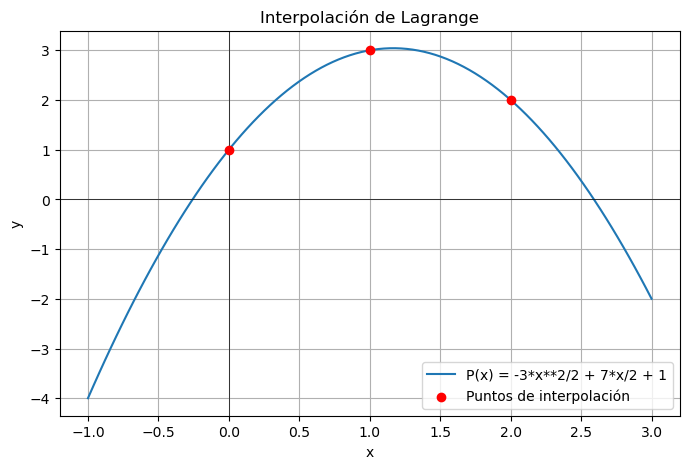

In [10]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
print("\n--- 3. POLINOMIO DE LAGRANGE (Cap. 2.7) ---")

def polinomio_lagrange(puntos, x_sym=sp.symbols('x')):
    """
    Calcula el polinomio de interpolación de Lagrange para un conjunto de puntos.
    
    Argumento:
    puntos -- Una lista de tuplas (x, y). Ej: [(x0, y0), (x1, y1), ...]
    x_sym -- El símbolo de SymPy a usar (normalmente 'x')
    """
    n = len(puntos)
    polinomio = 0 # Iniciamos el polinomio P(x) = 0
    
    for j in range(n):
        xj, yj = puntos[j]
        
        # Calcular el término L_j(x)
        L_j = 1 # Iniciamos el productor
        for i in range(n):
            if i == j:
                continue # Saltamos el caso i == j
            
            xi, yi = puntos[i]
            L_j = L_j * (x_sym - xi) / (xj - xi)
        
        # Añadir al polinomio total: P(x) = P(x) + y_j * L_j(x)
        polinomio = polinomio + yj * L_j
        
    # .expand() simplifica la expresión P(x) a la forma a*x^n + b*x^(n-1) + ...
    return polinomio.expand()

# --- EJEMPLO DE USO (Lagrange) ---

# 1. Define los puntos por los que quieres que pase el polinomio
# Ejemplo: (0, 1), (1, 3), (2, 2)
lista_puntos = [(0, 1), (1, 3), (2, 2)]

# 2. Calcula el polinomio simbólico
P_lagrange = polinomio_lagrange(lista_puntos)

print(f"Puntos a interpolar: {lista_puntos}")
print(f"Polinomio de Lagrange P(x) = {P_lagrange}")

# 3. Comprobación (opcional)
print("Comprobación:")
for x_val, y_val in lista_puntos:
    print(f"P({x_val}) = {P_lagrange.subs(x, x_val)} (Debería ser {y_val})")

# --- Graficar el resultado (Opcional, pero útil) ---
# 4. Convertir el polinomio de SymPy a una función numérica
P_num = sp.lambdify(x, P_lagrange, 'numpy')

# 5. Crear valores X para la gráfica
x_np = np.linspace(min(p[0] for p in lista_puntos) - 1, 
                   max(p[0] for p in lista_puntos) + 1, 
                   100)
y_np = P_num(x_np)

# 6. Separar los puntos originales para dibujarlos
x_puntos = [p[0] for p in lista_puntos]
y_puntos = [p[1] for p in lista_puntos]

# 7. Graficar
plt.figure(figsize=(8, 5))
plt.plot(x_np, y_np, label=f'P(x) = {P_lagrange}')
plt.scatter(x_puntos, y_puntos, color='red', zorder=5, label='Puntos de interpolación')
plt.title('Interpolación de Lagrange')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

In [13]:
#4. DERIVACIÓN Y APLICACIONES (Cap. 3 y 5.5)

In [ ]:
# ¡¡¡ CAMBIAR ESTA FUNCIÓN POR LA DEL EXAMEN !!!
f_deriv = x**3 - 6*x**2 + 9*x + 1
print(f"Función: f(x) = {f_deriv}")

# --- 4.1 Cálculo de Derivadas ---
df = sp.diff(f_deriv, x, 1)  # Primera derivada
d2f = sp.diff(f_deriv, x, 2) # Segunda derivada
print(f"  f'(x) = {df}")
print(f"  f''(x) = {d2f}")

# --- 4.2 Recta Tangente ---
# ¡¡¡ CAMBIAR EL PUNTO 'a' !!!
a_tangente = 0

f_a = f_deriv.subs(x, a_tangente)
df_a = df.subs(x, a_tangente)
recta_tangente = df_a * (x - a_tangente) + f_a # y = f'(a)(x-a) + f(a)
print(f"\nRecta tangente en x={a_tangente}:")
print(f"  y = {recta_tangente}")

# --- 4.3 Puntos Críticos (Máximos y Mínimos) ---
puntos_criticos = sp.solve(df, x)
print(f"\nPuntos críticos (f'(x)=0): {puntos_criticos}")

print("Clasificación (Criterio 2ª Derivada):")
for p in puntos_criticos:
    val_d2f = d2f.subs(x, p)
    if val_d2f > 0:
        print(f"  x={p} es un MÍNIMO local (f''({p}) = {val_d2f})")
    elif val_d2f < 0:
        print(f"  x={p} es un MÁXIMO local (f''({p}) = {val_d2f})")
    else:
        print(f"  x={p} es indeterminado por este criterio.")

# --- 4.4 Puntos de Inflexión (Concavidad) ---
puntos_inflexion = sp.solve(d2f, x)
print(f"\nPuntos de inflexión (f''(x)=0): {puntos_inflexion}")

# --- 4.5 Polinomio de Taylor ---
# ¡¡¡ CAMBIAR EL PUNTO 'a' Y EL GRADO 'n' !!!
a_taylor = 0
n_grado = 3

pol_taylor = sp.series(f_deriv, x, a_taylor, n_grado + 1).removeO()
print(f"\nPolinomio de Taylor (grado {n_grado}, en a={a_taylor}):")
print(f"  P(x) = {pol_taylor}")

In [11]:
#5. NumPy y Matplotlib (Cap. 5.3 y 5.4)

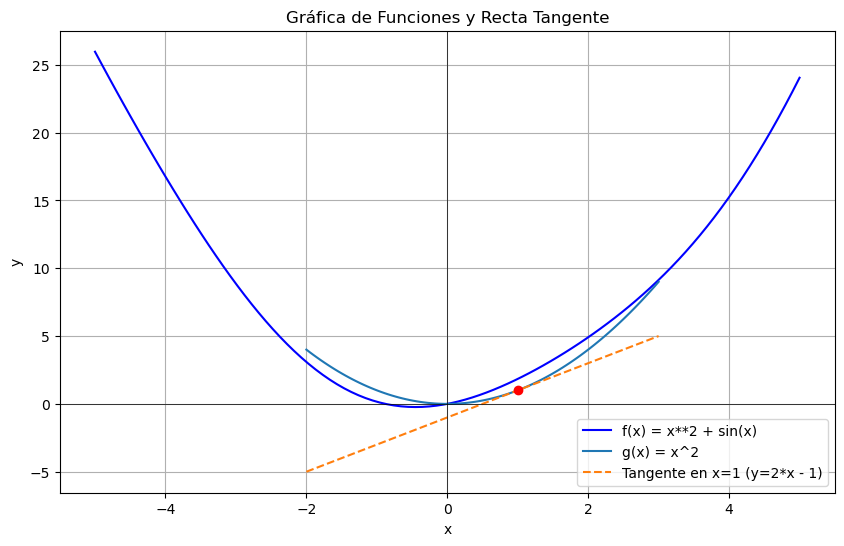

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# --- 1. Convertir una función de SymPy a NumPy (para graficar) ---
x_sym = sp.symbols('x')
f_sym = x_sym**2 + sp.sin(x_sym)

# Convertimos la expresión simbólica en una función numérica
# 'lambdify' crea una función de Python rápida
f_num = sp.lambdify(x_sym, f_sym, 'numpy')

# --- 2. Crear datos con NumPy (Cap. 5.3) ---
# Creamos un array de 100 puntos entre -5 y 5
# np.linspace(inicio, fin, num_puntos)
x_vals = np.linspace(-5, 5, 100)

# Calculamos los valores 'y' usando la función numérica
y_vals = f_num(x_vals)

# print(f"Valores X: {x_vals[:5]}...") # Muestra los primeros 5 valores X
# print(f"Valores Y: {y_vals[:5]}...") # Muestra los primeros 5 valores Y

# --- 3. Graficar con Matplotlib (Cap. 5.4) ---
plt.figure(figsize=(10, 6)) # Tamaño de la figura

# Graficar la función principal
plt.plot(x_vals, y_vals, label=f'f(x) = {f_sym}', color='blue')

# --- Graficar la recta tangente que encontramos antes ---
# (La recta era y = 8*x - 11, f = x**3 - 2*x**2 + 5)
# (Usaremos una función diferente para este ejemplo)

# Grafiquemos la tangente de f(x) = x^2 en x=1
g_sym = x_sym**2
dg_sym = sp.diff(g_sym, x_sym)

a = 1
g_a = g_sym.subs(x_sym, a)
dg_a = dg_sym.subs(x_sym, a)
tangente_sym = dg_a * (x_sym - a) + g_a

# Convertimos a funciones numéricas
g_num = sp.lambdify(x_sym, g_sym, 'numpy')
tangente_num = sp.lambdify(x_sym, tangente_sym, 'numpy')

# Creamos nuevos valores para la gráfica
x_plot = np.linspace(-2, 3, 100)
y_g = g_num(x_plot)
y_tangente = tangente_num(x_plot)

# Graficar
plt.plot(x_plot, y_g, label='g(x) = x^2')
plt.plot(x_plot, y_tangente, label=f'Tangente en x=1 (y={tangente_sym})', linestyle='--')
plt.scatter([a], [g_a], color='red', zorder=5) # Dibuja el punto de tangencia

# --- Configuración del gráfico ---
plt.title('Gráfica de Funciones y Recta Tangente')
plt.xlabel('x')
plt.ylabel('y')
plt.legend() # Muestra las etiquetas (labels)
plt.grid(True) # Añade una cuadrícula
plt.axhline(0, color='black', linewidth=0.5) # Eje X
plt.axvline(0, color='black', linewidth=0.5) # Eje Y
plt.show() # Muestra la gráfica